In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

# Read Datasets

In [2]:
files = [
    "other_data/!01_02_17_VSE.csv",
    "other_data/!03&04_17_VSE.csv",
    "other_data/!05&06_17_VSE.csv", 
    "other_data/!07&08_17_VSE.csv",
    "other_data/!09_10_17_VSE.csv", 
    "other_data/!11_17_VSE.csv",
]

all_data = []

for file in files:
    print(f"Processing: {file}")

    temp = pd.read_csv(file, sep=';', encoding='cp1251', decimal=',', low_memory=True, on_bad_lines='skip')

    temp['ДатаЗаказаНаСайте'] = pd.to_datetime(temp['ДатаЗаказаНаСайте'], format='%d.%m.%Y %H:%M', errors='coerce')

    temp = temp[temp['ДатаЗаказаНаСайте'] >= '2017-01-01']
    temp = temp[temp['ДатаЗаказаНаСайте'] < '2017-12-01']

    # temp = temp[temp['Статус'] == 'Доставлен']
    
    temp = temp.drop_duplicates()
    
    all_data.append(temp)


Processing: other_data/!01_02_17_VSE.csv
Processing: other_data/!03&04_17_VSE.csv
Processing: other_data/!05&06_17_VSE.csv
Processing: other_data/!07&08_17_VSE.csv
Processing: other_data/!09_10_17_VSE.csv
Processing: other_data/!11_17_VSE.csv


/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_48985/2337442029.py:15: DtypeWarning: Columns (26,27,28,32,33,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  temp = pd.read_csv(file, sep=';', encoding='cp1251', decimal=',', low_memory=True, on_bad_lines='skip')


# Clean Data

In [3]:
final_data = pd.concat(all_data, ignore_index=True)
final_data = final_data.drop_duplicates()

final_data = final_data[final_data['Телефон_new'].notna() & 
                       (final_data['Телефон_new'] != '0') & 
                       (final_data['Телефон_new'] != ' ') & 
                       (final_data['Телефон_new'].str.contains('-'))]

final_data['quarter'] = final_data['ДатаЗаказаНаСайте'].dt.to_period('Q')

final_data

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДаты Заказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа,МесяцДатыЗаказа,quarter
0,01.01.2017 17:15,04.01.2017 0:00,3530280_TR,Возврат из ПВЗ,2 800,2 800,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ","ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",головные уборы,ОДЕЖДА,"REIMA, ШАПКА Cabin (гол), р. 52",МГТ,Нет,NaN,1,1 400,1 400,"1 025,13",1.0,2 017,23111,Возврат,Москва,"374,87",0,0,2.0,0,2017-01-01,55575454-49504949555170,110109_nm19@gmail.com,Анжелика,IDL00023865048,0,NaN,NaN,2017Q1
1,01.01.2017 17:15,04.01.2017 0:00,3530280_TR,Возврат из ПВЗ,2 800,2 800,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ","ГОЛОВНЫЕ УБОРЫ, ВАРЕЖКИ, ПЕРЧАТКИ",головные уборы,ОДЕЖДА,"REIMA, ШАПКА Starrie (роз), р. 50",МГТ,Нет,NaN,1,1 400,1 400,"1 025,13",1.0,2 017,23111,Возврат,Москва,"374,87",0,0,1.0,0,2017-01-01,55575454-49504949555170,110109_nm19@gmail.com,Анжелика,IDL00022519452,0,NaN,NaN,2017Q1
2,01.01.2017 17:38,03.01.2017 0:00,3530303_TR,К отгрузке,3 585,3 585,Курьерская,Наличная,Москва,ПОДГУЗНИКИ,ПОДГУЗНИКИ,подгузники,ППКП,"ГУН, ПОДГУЗНИКИ, M (6-11 кг) (64 шт)",МГТ,Нет,NaN,3,1 195,3 585,"1 154,25",1.0,2 017,NaN,Доставлен,Москва,"122,25",0,0,1.0,0,2017-01-01,55574851-55555555555176,49117_1u16@mail.ru,Anastasia,IDL00038454553,0,NaN,NaN,2017Q1
3,01.01.2017 17:38,04.01.2017 0:00,3530318_TR,Доставлен,2 510,2 510,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,брюки,ОДЕЖДА,"LUHTA, БРЮКИ Kauto (черн), р.146",МГТ,Нет,NaN,1,2 510,2 510,"2 227,06",1.0,2 017,23111,Доставлен,Москва,"282,94",0,0,1.0,1,2017-01-02,55575054-56575354545171,115117_su21@mail.ru,Гость,IDL00035301654,0,NaN,NaN,2017Q1
4,01.01.2017 17:38,02.01.2017 0:00,3530313_TR,К отгрузке,1 069,1 069,Самовывоз,Наличная,Санкт-Петербург,ИГРУШКИ,КОНСТРУКТОРЫ,конструкторы - тип Лего,ИГРУШКИ,"LEGO Friends, КОНСТРУКТОР Поп-звезда: телестуд...",МГТ,Нет,NaN,1,1 069,1 069,"985,03",1.0,2 017,901000646,Доставлен,Регионы,"83,97",0,0,1.0,1,2017-01-02,55575149-50524951545076,106117_ju18@yandex.ru,Гость,ID9010025983048,0,NaN,NaN,2017Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3624725,01.11.2017 13:16,03.11.2017 0:00,6006427_TR,Возврат из ПВЗ,36 941,36 941,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,комбинезоны,ОДЕЖДА,"LASSIE, КОМБИНЕЗОН (гол/черн), р.128",МГТ,Нет,NaN,1,4 599,4 599,"2 299,50",NaN,2 017,GL0285876,Возврат,Москва,"2 299,50",149,149,6.0,0,2017-11-01,55574853-55565651545272,NaN,0,IDL00053591351,0,NaN,11.0,2017Q4
3624726,01.11.2017 13:16,03.11.2017 0:00,6006427_TR,Возврат из ПВЗ,36 941,36 941,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,комбинезоны,ОДЕЖДА,"LASSIE, КОМБИНЕЗОН (черн), р.122",МГТ,Нет,NaN,1,4 599,4 599,"2 299,50",NaN,2 017,GL0285876,Возврат,Москва,"2 299,50",149,149,7.0,1,2017-11-01,55574853-55565651545272,NaN,0,IDL00053591957,0,NaN,11.0,2017Q4
3624727,01.11.2017 13:16,03.11.2017 0:00,6006427_TR,Возврат из ПВЗ,36 941,36 941,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,комбинезоны,ОДЕЖДА,"LASSIE, КОМБИНЕЗОН (черн), р.128",МГТ,Нет,NaN,1,4 599,4 599,"2 299,50",NaN,2 017,GL0285876,Возврат,Москва,"2 299,50",149,149,8.0,0,2017-11-01,55574853-55565651545272,NaN,0,IDL00053592048,0,NaN,11.0,2017Q4
3624728,01.11.2017 13:16,03.11.2017 0:00,6006427_TR,Возврат из ПВЗ,36 941,36 941,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,комбинезоны,ОДЕЖДА,"LASSIE, КОМБИНЕЗОН (черн/салат), р.122",МГТ,Нет,NaN,1,4 599,4 599,"2 299,50",NaN,2 017,GL0285876,Возврат,Москва,"2 299,50",149,149,1.0,0,

## some analytics

In [6]:
df = final_data

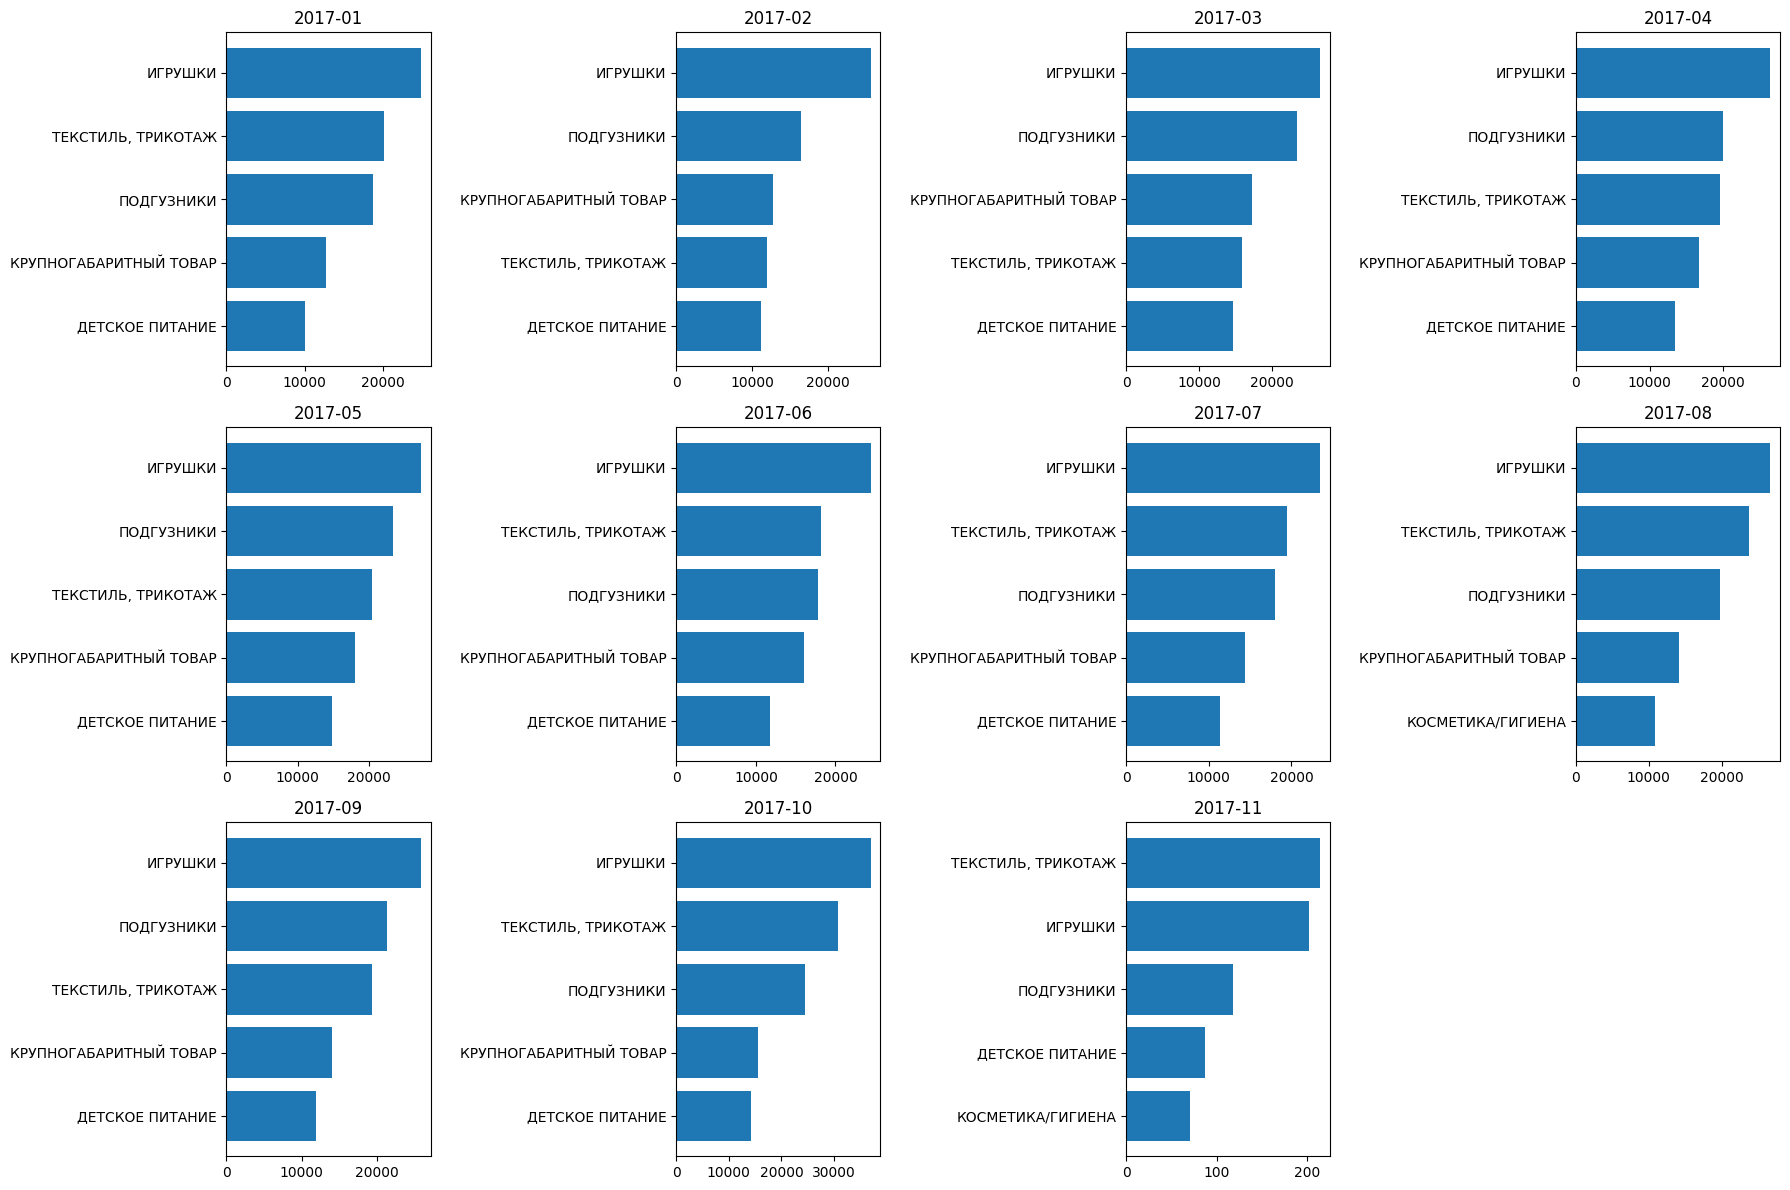

In [7]:
# different categories purchasing trends

df['ДатаЗаказаНаСайте'] = pd.to_datetime(df['ДатаЗаказаНаСайте'], errors='coerce')
df = df.dropna(subset=['ДатаЗаказаНаСайте'])
df['year_month'] = df['ДатаЗаказаНаСайте'].dt.to_period('M')

df_unique = df.drop_duplicates(subset=['НомерЗаказаНаСайте', 'Группа2', 'year_month'])

monthly_orders = df_unique.groupby(['year_month', 'Группа2'])['НомерЗаказаНаСайте'].count().reset_index()

top5_monthly = (
    monthly_orders.sort_values(['year_month', 'НомерЗаказаНаСайте'], ascending=[True, False])
    .groupby('year_month')
    .head(5)
)

# top5 each month
unique_months = top5_monthly['year_month'].unique()
n_months = len(unique_months)
n_cols = 4
n_rows = -(-n_months // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for i, month in enumerate(unique_months):
    data = top5_monthly[top5_monthly['year_month'] == month]
    axes[i].barh(data['Группа2'], data['НомерЗаказаНаСайте'])
    axes[i].set_title(str(month))
    axes[i].invert_yaxis()

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


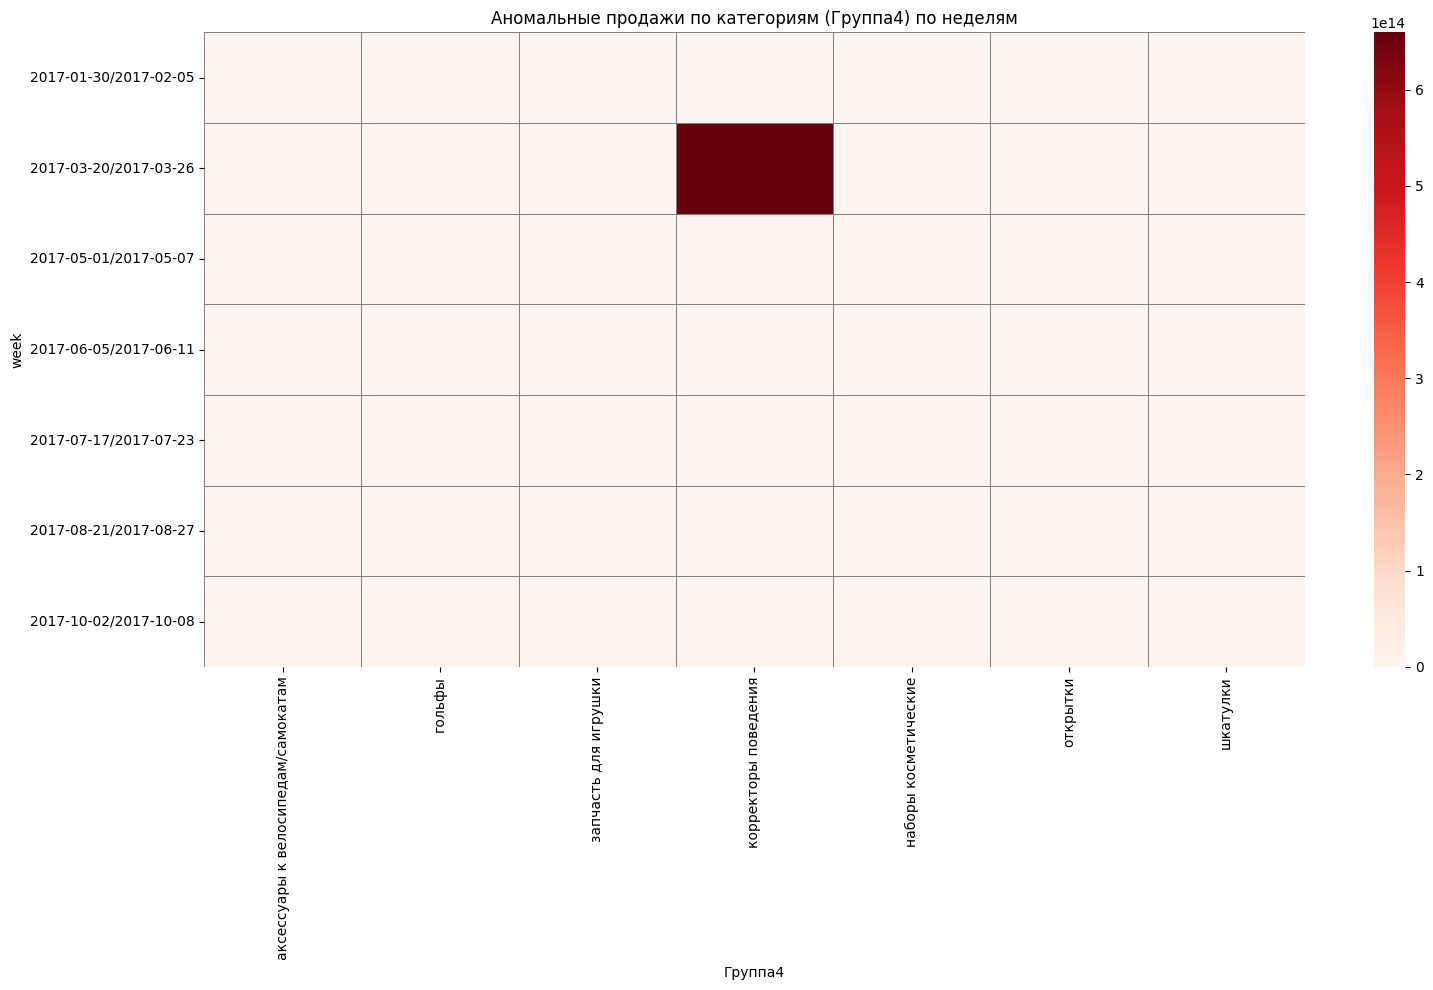

In [13]:
from scipy.stats import zscore

df['week'] = df['ДатаЗаказаНаСайте'].dt.to_period('W').astype(str)
weekly_sales = df.groupby(['week', 'Группа4'])['СуммаДокумента'].sum().reset_index()
weekly_sales['СуммаДокумента'] = pd.to_numeric(weekly_sales['СуммаДокумента'], errors='coerce')
weekly_sales = weekly_sales.dropna(subset=['СуммаДокумента'])

# z-score by Группа4
weekly_sales['z_score'] = weekly_sales.groupby('Группа4')['СуммаДокумента'].transform(
    lambda x: zscore(x, ddof=0)
)
anomalies = weekly_sales[weekly_sales['z_score'] > 1.96]

pivot = anomalies.pivot(index='week', columns='Группа4', values='СуммаДокумента').fillna(0)

plt.figure(figsize=(16, 10))
plt.title("Аномальные продажи по категориям (Группа4) по неделям")
plt.xlabel("Категория")
plt.ylabel("Неделя")
plt.xticks(rotation=90)
sns.heatmap(pivot, cmap="Reds", linewidths=0.5, linecolor='gray')
plt.tight_layout()
plt.show()

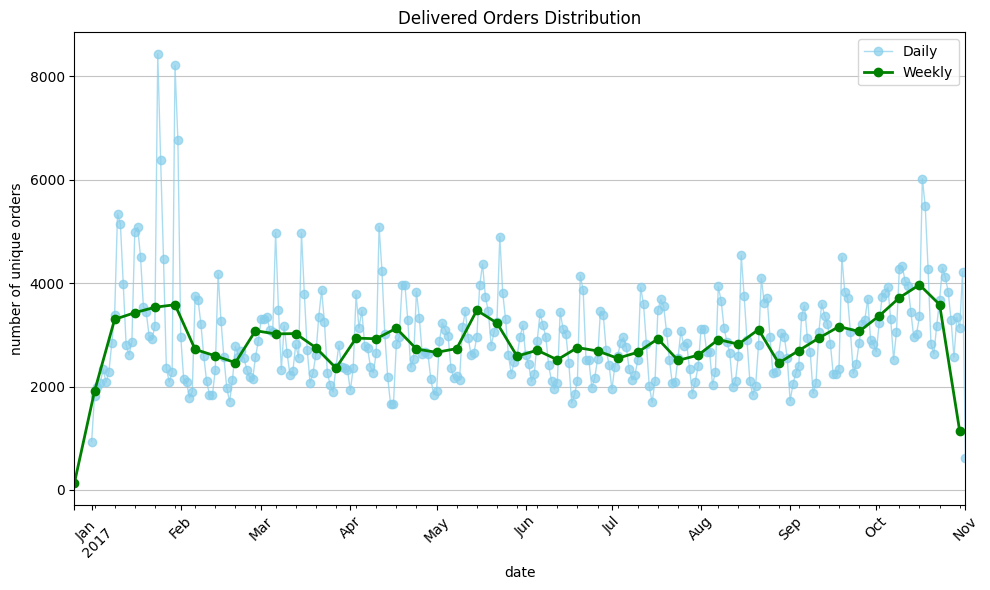

In [53]:
delivered_orders_count_by_date = final_data.groupby('ДатаЗаказаНаСайте')['НомерЗаказаНаСайте'].nunique()
delivered_orders_mean_by_week = final_data.resample('W', on='ДатаЗаказаНаСайте')['НомерЗаказаНаСайте'].nunique() / 7

plt.figure(figsize=(10, 6))

delivered_orders_count_by_date.plot(kind='line', marker='o', color='skyblue', linewidth=1, alpha=0.7, label='Daily')
delivered_orders_mean_by_week.plot(kind='line', marker='o', color='green', linewidth=2, label='Weekly')

plt.title('Delivered Orders Distribution')
plt.xlabel('date')
plt.ylabel('number of unique orders')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## cleaning

In [54]:
final_data.columns

Index(['Дата', 'ДатаДоставки', 'НомерЗаказаНаСайте', 'НовыйСтатус',
       'СуммаЗаказаНаСайте', 'СуммаДокумента', 'МетодДоставки', 'ФормаОплаты',
       'Регион', 'Группа2', 'Группа3', 'Группа4', 'Тип', 'Номенклатура',
       'ТипТовара', 'Отменено', 'ПричинаОтмены', 'Количество', 'Цена',
       'СуммаСтроки', 'ЦенаЗакупки', 'МесяцДаты Заказа', 'ГодДатыЗаказа',
       'ПВЗ_код', 'Статус', 'Гео', 'Маржа', 'СуммаУслуг', 'СуммаДоставки',
       'НомерСтроки', 'КоличествоПроданоКлиенту', 'ДатаЗаказаНаСайте',
       'Телефон_new', 'ЭлектроннаяПочта_new', 'Клиент', 'ID_SKU',
       'ГородМагазина', 'МагазинЗаказа', 'МесяцДатыЗаказа', 'quarter'],
      dtype='object')

In [71]:
# buyers with more than one purchase
global_order_counts = final_data.groupby('Телефон_new')['НомерЗаказаНаСайте'].nunique()

valid_customers = global_order_counts[global_order_counts > 1].index
final_data = final_data[final_data['Телефон_new'].isin(valid_customers)]

In [72]:
current_date = final_data['ДатаЗаказаНаСайте'].max()

final_data['ДатаЗаказаНаСайте'] = pd.to_datetime(final_data['ДатаЗаказаНаСайте'], format='%d.%m.%Y %H:%M', errors='coerce')
final_data['СуммаДокумента'] = final_data['СуммаДокумента'].astype(str).str.replace(' ', '').str.replace(',', '.').astype(float)
final_data['Цена'] = final_data['Цена'].astype(str).str.replace(' ', '').str.replace(',', '.').astype(float)
final_data['Маржа'] = final_data['Маржа'].astype(str).str.replace(' ', '').str.replace(',', '.').astype(float)

/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_58098/787537852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['ДатаЗаказаНаСайте'] = pd.to_datetime(final_data['ДатаЗаказаНаСайте'], format='%d.%m.%Y %H:%M', errors='coerce')
/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_58098/787537852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['СуммаДокумента'] = final_data['СуммаДокумента'].astype(str).str.replace(' ', '').str.replace(',', '.').astype(float)
/var/

In [ ]:
# df_read = final_data
# final_data = df_read

# Preprocessing

In [ ]:
final_data['days_between_orders'] = final_data.groupby('Телефон_new')['ДатаЗаказаНаСайте'].diff().dt.days


/var/folders/3d/lk68rk7n1193l_m6m4f2nlkw0000gp/T/ipykernel_58098/1650309503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['days_between_orders'] = final_data.groupby('Телефон_new')['ДатаЗаказаНаСайте'].diff().dt.days


In [74]:
# count defects (cancellations and returns)
defects_df = final_data.groupby(['Телефон_new', 'quarter']).agg(
    defects=('Статус', lambda x: ((x == 'Возврат') | (x == 'Отменен')).sum()),
    total_orders=('Статус', 'count')
).reset_index()

defects_df['defect_ratio'] = defects_df['defects'] / defects_df['total_orders']
defects_df['defect_ratio'] = defects_df['defect_ratio'].clip(0, 1).astype(float)
defects_df = defects_df[['Телефон_new', 'quarter', 'defect_ratio']]

In [75]:
final_data_cleaned = final_data[final_data['Статус'] == 'Доставлен'].copy()
final_data = final_data_cleaned.merge(defects_df, on=['Телефон_new', 'quarter'], how='left')

In [76]:
# final_data['black_friday_flag'] = final_data['ДатаЗаказаНаСайте'].apply(
#     lambda x: x.month == 11 and 15 <= x.day <= 30
# )

In [77]:
final_data['newyear_flag'] = final_data['ДатаЗаказаНаСайте'].apply(
    lambda x: (x.month == 12 and x.day >= 30) or (x.month == 1 and x.day <= 9)
)

In [78]:
final_data['is_weekend'] = final_data['ДатаЗаказаНаСайте'].dt.dayofweek >= 5  # weekends flag
final_data['month'] = final_data['ДатаЗаказаНаСайте'].dt.month

In [79]:
final_data

,Дата,ДатаДоставки,НомерЗаказаНаСайте,НовыйСтатус,СуммаЗаказаНаСайте,СуммаДокумента,МетодДоставки,ФормаОплаты,Регион,Группа2,Группа3,Группа4,Тип,Номенклатура,ТипТовара,Отменено,ПричинаОтмены,Количество,Цена,СуммаСтроки,ЦенаЗакупки,МесяцДаты Заказа,ГодДатыЗаказа,ПВЗ_код,Статус,Гео,Маржа,СуммаУслуг,СуммаДоставки,НомерСтроки,КоличествоПроданоКлиенту,ДатаЗаказаНаСайте,Телефон_new,ЭлектроннаяПочта_new,Клиент,ID_SKU,ГородМагазина,МагазинЗаказа,МесяцДатыЗаказа,quarter,days_between_orders,defect_ratio,newyear_flag,is_weekend,month
0,01.01.2017 17:38,04.01.2017 0:00,3530318_TR,Доставлен,2 510,2510.0,Магазины,Безналичная,Москва,"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,брюки,ОДЕЖДА,"LUHTA, БРЮКИ Kauto (черн), р.146",МГТ,Нет,NaN,1,2510.0,2 510,"2 227,06",1.0,2 017,23111,Доставлен,Москва,282.94,0,0,1.0,1,2017-01-02,55575054-56575354545171,115117_su21@mail.ru,Гость,IDL00035301654,0,NaN,NaN,2017Q1,NaN,0.266667,True,False,1
1,01.01.2017 17:38,03.01.2017 0:00,3530322_TR,К отгрузке,6 858,6858.0,Курьерская,Наличная,Жуковский (Московская область район),ИГРУШКИ,МЯГКИЕ ИГРУШКИ,NaN,ИГРУШКИ,"FURREAL FRIENDS, ДРАКОША милый",МГТ,Нет,NaN,1,6858.0,6 858,"6 194,19",1.0,2 017,NaN,Доставлен,МО,663.81,0,0,1.0,1,2017-01-02,55575054-49555657564875,112117_pu15@mail.ru,Елена,IDL00031529351,0,NaN,NaN,2017Q1,0.0,0.666667,True,False,1
2,01.01.2017 17:38,03.01.2017 0:00,3530322_TR,К отгрузке,6 858,6858.0,Курьерская,Наличная,Жуковский (Московская область район),ИГРУШКИ,МЯГКИЕ ИГРУШКИ,NaN,ИГРУШКИ,"FURREAL FRIENDS, ДРАКОША милый",МГТ,Нет,NaN,1,6858.0,6 858,"6 194,19",1.0,2 017,NaN,Доставлен,МО,663.81,0,0,1.0,1,2017-01-02,55575054-49555657564875,112117_pu15@mail.ru,Елена,ID10018600250,0,NaN,NaN,2017Q1,0.0,0.666667,True,False,1
3,01.01.2017 17:38,12.01.2017 0:00,3530309_TR,К отгрузке,4 130,4130.0,DPD,Безналичная,Подольск (Московская область район),"ТЕКСТИЛЬ, ТРИКОТАЖ",ВЕРХНЯЯ ДЕТСКАЯ ОДЕЖДА,куртки,ОДЕЖДА,"REIMA, КУРТКА Taag (желт), р. 98",МГТ,Нет,NaN,1,4130.0,4 130,"3 025,13",1.0,2 017,NaN,Доставлен,МО,1104.87,0,0,1.0,1,2017-01-02,55574857-54575250515477,97117_au15@list.ru,Александра,IDL00016469048,0,NaN,NaN,2017Q1,NaN,0.000000,True,False,1
4,01.01.2017 17:38,02.01.2017 0:00,3530314_TR,К отгрузке,1 199,1199.0,Самовывоз,Наличная,Новосибирск,ПОДГУЗНИКИ,ПОДГУЗНИКИ,трусики-подгузники,ППКП,"MOONY, ТРУСИКИ, (6-10 кг), (58 шт)",МГТ,Нет,NaN,1,1199.0,1 199,1 100,1.0,2 017,23111,Доставлен,Регионы,99.00,0,0,1.0,1,2017-01-02,55575051-49495453545474,112117_pu16@mail.ru,Гость,IDL00018187149,0,NaN,NaN,2017Q1,NaN,0.000000,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888698,01.11.2017 10:08,24.11.2017 0:00,6006401_TR,Доставлен,7 037,7037.0,Магазины,Безналичная,Смоленск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"SIMBA, ПЛИТА кухонная, с акс.",МГТ,Нет,NaN,1,870.0,870,"564,2",NaN,2 017,23111,Доставлен,Регионы,305.80,99,99,3.0,1,2017-11-01,55574953-54525651545574,guest_103117_gu28@workmail.ru,Гость,ID10002369452,0,NaN,11.0,2017Q4,0.0,0.250000,False,False,11
1888699,01.11.2017 10:08,24.11.2017 0:00,6006401_TR,Доставлен,7 037,7037.0,Магазины,Безналичная,Смоленск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,имитационные игрушки для девочек,ИГРУШКИ,"NO NAME, ПЫЛЕСОС эл.",МГТ,Нет,NaN,1,469.0,469,"337,48",NaN,2 017,23111,Доставлен,Регионы,131.52,99,99,2.0,1,2017-11-01,55574953-54525651545574,guest_103117_gu28@workmail.ru,Гость,IDL00040493856,0,NaN,11.0,2017Q4,0.0,0.250000,False,False,11
1888700,01.11.2017 10:08,24.11.2017 0:00,6006401_TR,Доставлен,7 037,7037.0,Магазины,Безналичная,Смоленск,ИГРУШКИ,ИГРУШКИ ДЛЯ ДЕВОЧЕК,аксессуары для кукол,ИГРУШКИ,"EDUFUN, ДОМ для кукол, с комп. мебелью, (59*30...",МГТ,Нет,NaN,1,5599.0,5 599,2 873,NaN,2 017,23111,Доставлен,Регионы,2726.00,99,99,1.0,1,2017-11-01,55574953-54525651545574,guest_103117_gu28@workmail.ru,Гость,ID9010026667856,0,NaN,11.0,2017Q4,0.0,0.250000,False,False,11
1888701,01.11.2017 10:

In [83]:
quarterly_features = final_data.groupby(['Телефон_new', 'quarter']).agg(
    total_orders=('НомерЗаказаНаСайте', 'nunique'),
    unique_sku=('ID_SKU', 'nunique'),
    avg_sku_per_order=('ID_SKU', lambda x: len(x) / x.nunique() if x.nunique() > 0 else 0),
    avg_check=('СуммаДокумента', 'mean'),
    med_check=('СуммаДокумента', 'median'),
    avg_sku_check=('Цена', 'mean'),
    med_sku_check=('Цена', 'median'),
    mean_days_between_orders=('days_between_orders', 'mean'),
    median_days_between_orders=('days_between_orders', 'median'),
    total_margin=('Маржа', 'sum'),
    newyear_flag=('newyear_flag', 'sum'),  
    weekend_order_share=('is_weekend', 'mean'), 
    peak_month_ratio=('month', lambda x: np.mean(x.isin([2, 10]))) 
).reset_index()


In [86]:
quarterly_features = quarterly_features.merge(
    defects_df,
    on=['Телефон_new', 'quarter'],
    how='left'
)

quarterly_features['defect_ratio'] = quarterly_features['defect_ratio'].fillna(0)

In [87]:
# categorical delivery methods (number coding)
delivery_mapping = {
    "Курьерская": 0, "Магазины": 1, "Самовывоз": 2,
    "DPD": 3, "Pick point": 4, "Транспортная компания": 5
}
delivery_mode = final_data.groupby(['Телефон_new', 'quarter'])['МетодДоставки'].agg(
    lambda x: delivery_mapping.get(x.mode().iloc[0], -1) if not x.mode().empty else -1
).rename('delivery_method').reset_index()

In [88]:
# binary payment sign (0 - cash, 1 - non-cash)
payment_mapping = {"Наличная": 0, "Безналичная": 1}
payment_mode = final_data.groupby(['Телефон_new', 'quarter'])['ФормаОплаты'].agg(
    lambda x: payment_mapping.get(x.mode().iloc[0], -1) if not x.mode().empty else -1
).rename('payment_method').reset_index()

In [89]:
# binary goods size sign (0 - МГТ, 1 - КГТ)
payment_mapping = {"МГТ": 0, "КГТ": 1}
payment_mode = final_data.groupby(['Телефон_new', 'quarter'])['ТипТовара'].agg(
    lambda x: payment_mapping.get(x.mode().iloc[0], -1) if not x.mode().empty else -1
).rename('good_type').reset_index()

In [90]:
def categorize_geo(city):
    if city == "Москва":
        return "Москва"
    elif city == "Санкт-Петербург":
        return "Санкт-Петербург"
    else:
        return "Other"
    
final_data['Гео_Категория'] = final_data['Гео'].apply(categorize_geo)

In [91]:
# categorical geo sign 
geo_mapping = {"Москва": 0, 
               "Санкт-Петербург": 1, 
               "Other": 2}

geo_mode = final_data.groupby(['Телефон_new', 'quarter'])['Гео_Категория'].agg(
    lambda x: geo_mapping.get(x.mode().iloc[0], -1) if not x.mode().empty else -1
).rename('Geo').reset_index()


In [92]:
# union
quarterly_features = quarterly_features.merge(delivery_mode, on=['Телефон_new', 'quarter'], how='left')
quarterly_features = quarterly_features.merge(payment_mode, on=['Телефон_new', 'quarter'], how='left')
quarterly_features = quarterly_features.merge(geo_mode, on=['Телефон_new', 'quarter'], how='left')

In [93]:
quarterly_features.head(5)

,Телефон_new,quarter,total_orders,unique_sku,avg_sku_per_order,avg_check,med_check,avg_sku_check,med_sku_check,mean_days_between_orders,median_days_between_orders,total_margin,newyear_flag,weekend_order_share,peak_month_ratio,defect_ratio,delivery_method,good_type,Geo
0,55525753-50494856495470,2017Q2,1,2,1.0,4809.000000,4809.0,2404.500000,2404.5,0.0,0.0,600.00,0,0.0,0.0,0.500000,0,0,0
1,55525753-50535655495477,2017Q1,1,2,1.0,900.000000,900.0,300.000000,300.0,0.0,0.0,138.00,0,1.0,1.0,0.600000,0,0,0
2,55525753-53565350484974,2017Q1,2,3,1.0,2999.333333,3300.0,912.666667,1100.0,15.0,15.0,579.08,0,0.0,0.0,0.000000,0,0,0
3,55525753-54565357505774,2017Q2,1,3,1.0,3880.000000,3880.0,125.333333,122.0,0.0,0.0,444.55,0,0.0,0.0,0.400000,5,0,2
4,55525753-55515454494872,2017Q3,1,6,1.0,3668.000000,3668.0,346.666667,199.5,0.0,0.0,628.40,0,0.0,0.0,0.538462,0,0,0


In [94]:
# add categorical attributes by Group2
group2_quarterly = final_data.groupby(['Телефон_new', 'quarter', 'Группа2']).size().unstack(fill_value=0)
group2_quarterly = group2_quarterly.reset_index()
quarterly_features = quarterly_features.merge(group2_quarterly, on=['Телефон_new', 'quarter'], how='left')
quarterly_features = quarterly_features.fillna(0)

In [95]:
nan_counts = quarterly_features.isna().sum()
nan_counts

Телефон_new                   0
quarter                       0
total_orders                  0
unique_sku                    0
avg_sku_per_order             0
avg_check                     0
med_check                     0
avg_sku_check                 0
med_sku_check                 0
mean_days_between_orders      0
median_days_between_orders    0
total_margin                  0
newyear_flag                  0
weekend_order_share           0
peak_month_ratio              0
defect_ratio                  0
delivery_method               0
good_type                     0
Geo                           0
ДЕТСКОЕ ПИТАНИЕ               0
ЖЕНСКИЕ ШТУЧКИ                0
ИГРУШКИ                       0
КАНЦТОВАРЫ, КНИГИ, ДИСКИ      0
КОСМЕТИКА/ГИГИЕНА             0
КРУПНОГАБАРИТНЫЙ ТОВАР        0
ОБУВЬ                         0
ПОДГУЗНИКИ                    0
СОПУТСТВУЮЩИЕ ТОВАРЫ          0
ТЕКСТИЛЬ, ТРИКОТАЖ            0
ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА     0
ТОВАРЫ ДЛЯ ЖИВОТНЫХ           0
ТОВАРЫ Д

In [96]:
quarterly_features['mean_days_between_orders'] = quarterly_features.groupby('quarter')['mean_days_between_orders']\
    .transform(lambda x: x.fillna(x.mean()))

quarterly_features['median_days_between_orders'] = quarterly_features.groupby('quarter')['median_days_between_orders']\
    .transform(lambda x: x.fillna(x.median()))

In [97]:
quarterly_features

,Телефон_new,quarter,total_orders,unique_sku,avg_sku_per_order,avg_check,med_check,avg_sku_check,med_sku_check,mean_days_between_orders,median_days_between_orders,total_margin,newyear_flag,weekend_order_share,peak_month_ratio,defect_ratio,delivery_method,good_type,Geo,ДЕТСКОЕ ПИТАНИЕ,ЖЕНСКИЕ ШТУЧКИ,ИГРУШКИ,"КАНЦТОВАРЫ, КНИГИ, ДИСКИ",КОСМЕТИКА/ГИГИЕНА,КРУПНОГАБАРИТНЫЙ ТОВАР,ОБУВЬ,ПОДГУЗНИКИ,СОПУТСТВУЮЩИЕ ТОВАРЫ,"ТЕКСТИЛЬ, ТРИКОТАЖ",ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ТОВАРЫ ДЛЯ КОРМЛЕНИЯ
0,55525753-50494856495470,2017Q2,1,2,1.00,4809.000000,4809.0,2404.500000,2404.5,0.0,0.0,600.00,0,0.0,0.0,0.500000,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55525753-50535655495477,2017Q1,1,2,1.00,900.000000,900.0,300.000000,300.0,0.0,0.0,138.00,0,1.0,1.0,0.600000,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,55525753-53565350484974,2017Q1,2,3,1.00,2999.333333,3300.0,912.666667,1100.0,15.0,15.0,579.08,0,0.0,0.0,0.000000,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,55525753-54565357505774,2017Q2,1,3,1.00,3880.000000,3880.0,125.333333,122.0,0.0,0.0,444.55,0,0.0,0.0,0.400000,5,0,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,55525753-55515454494872,2017Q3,1,6,1.00,3668.000000,3668.0,346.666667,199.5,0.0,0.0,628.40,0,0.0,0.0,0.538462,0,0,0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231695,57485355-52485257575698,2017Q1,1,1,1.00,2076.000000,2076.0,2076.000000,2076.0,0.0,0.0,238.00,0,0.0,0.0,0.000000,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
231696,57495351-50535151545597,2017Q3,1,6,1.00,1827.000000,1827.0,523.000000,161.0,12.0,0.0,343.63,0,1.0,0.0,0.000000,1,0,0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
231697,57505754-52565350494991,2017Q1,1,2,1.00,8303.000000,8303.0,4151.500000,4151.5,0.0,0.0,954.22,0,0.0,0.0,0.333333,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
231698,57545549-57544957525799,2017Q2,1,1,1.00,2560.000000,2560.0,2560.000000,2560.0,0.0,0.0,294.00,0,1.0,0.0,0.909091,1,1,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
quarterly_features.to_excel('quarterly_features.xlsx', index=False)

# other

In [24]:
df = pd.read_excel('quarterly_features.xlsx')